Dữ liệu City A:
 [('2025-01', 1875.) ('2025-02', 2451.) ('2025-03', 2232.)
 ('2025-04', 3699.) ('2025-05', 1656.) ('2025-06', 1656.)
 ('2025-07', 1558.) ('2025-08', 2366.) ('2025-09', 3327.)
 ('2025-10', 2208.) ('2025-11',  955.) ('2025-12', 2470.)]

Dữ liệu City B:
 [('2025-01', 1583.) ('2025-02', 1704.) ('2025-03', 3309.)
 ('2025-04', 1832.) ('2025-05', 1691.) ('2025-06',  862.)
 ('2025-07', 1539.) ('2025-08', 3355.) ('2025-09', 1766.)
 ('2025-10', 1856.) ('2025-11', 2185.) ('2025-12', 1600.)]

City A dtype: [('month', '<U7'), ('avg_price', '<f8')]
City A shape: (12,)
3 dòng đầu A:
 [('2025-01', 1875.) ('2025-02', 2451.) ('2025-03', 2232.)]
3 dòng cuối A:
 [('2025-10', 2208.) ('2025-11',  955.) ('2025-12', 2470.)]

City B dtype: [('month', '<U7'), ('avg_price', '<f8')]
City B shape: (12,)
3 dòng đầu B:
 [('2025-01', 1583.) ('2025-02', 1704.) ('2025-03', 3309.)]
3 dòng cuối B:
 [('2025-10', 1856.) ('2025-11', 2185.) ('2025-12', 1600.)]

Q1: [1875. 2451. 2232.]
Q2: [3699. 1656. 1656.]


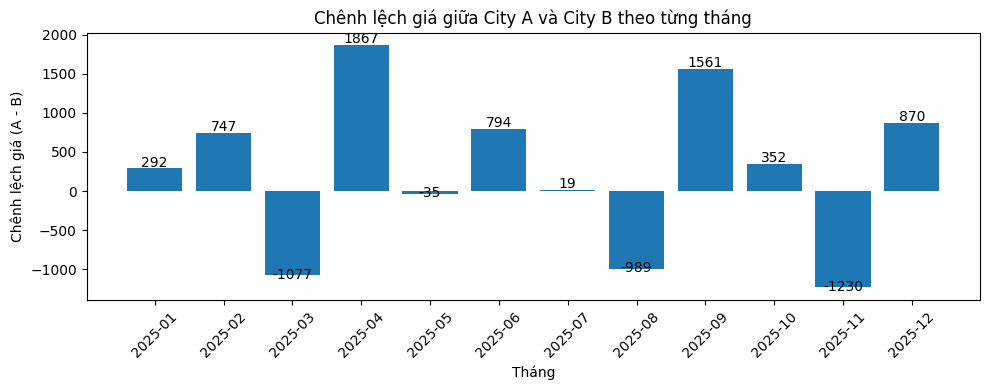


✔ Đã xuất file: ket_qua_case_4.csv


In [ ]:
import numpy as np

# 1 đọc dữ liệu từ file csv
data_a = np.genfromtxt("city_a.csv", delimiter=",",
                       dtype=[("month", "U7"), ("avg_price", "f8")],
                       skip_header=1, autostrip=True, encoding="utf-8")

data_b = np.genfromtxt("city_b.csv", delimiter=",",
                       dtype=[("month", "U7"), ("avg_price", "f8")],
                       skip_header=1, autostrip=True, encoding="utf-8")

print("Dữ liệu City A:\n", data_a)
print("\nDữ liệu City B:\n", data_b)
#2 tách dữ liệu

month_a = data_a["month"]
price_a = data_a["avg_price"]

month_b = data_b["month"]
price_b = data_b["avg_price"]
# 3 kiểm tra dữ liệu
print("\nCity A dtype:", data_a.dtype)
print("City A shape:", data_a.shape)
print("3 dòng đầu A:\n", data_a[:3])
print("3 dòng cuối A:\n", data_a[-3:])

print("\nCity B dtype:", data_b.dtype)
print("City B shape:", data_b.shape)
print("3 dòng đầu B:\n", data_b[:3])
print("3 dòng cuối B:\n", data_b[-3:])

# 4 chuyển sang dạng datetime64
month_a_dt = month_a.astype("datetime64[M]")
month_b_dt = month_b.astype("datetime64[M]")
# 5 chia theo quý

Q1 = price_a[0:3]
Q2 = price_a[3:6]
Q3 = price_a[6:9]
Q4 = price_a[9:12]

print("\nQ1:", Q1)
print("Q2:", Q2)
print("Q3:", Q3)
print("Q4:", Q4)
# 6 boolean mask, phát hiện tăng giảm
ratio_a = price_a[1:] / price_a[:-1]
ratio_b = price_b[1:] / price_b[:-1]

inc_a = month_a[1:][ratio_a > 1.10]
dec_a = month_a[1:][ratio_a < 0.90]

inc_b = month_b[1:][ratio_b > 1.10]
dec_b = month_b[1:][ratio_b < 0.90]

print("\nCity A tăng >110%:", inc_a)
print("City A giảm <90%:", dec_a)

print("\nCity B tăng >110%:", inc_b)
print("City B giảm <90%:", dec_b)

#7 np.diff, phân tích biến động giá theo tháng
delta_a = np.diff(price_a)
delta_b = np.diff(price_b)

strong_a = month_a[1:][np.abs(delta_a) >= 150]
strong_b = month_b[1:][np.abs(delta_b) >= 150]

print("\nBiến động mạnh City A (≥150):", strong_a)
print("Biến động mạnh City B (≥150):", strong_b)
#8 top biến động
top_inc_idx = np.argsort(delta_a)[-3:]
top_dec_idx = np.argsort(delta_a)[:3]

top_inc_months = month_a[1:][top_inc_idx]
top_dec_months = month_a[1:][top_dec_idx]

print("\nTop 3 tháng tăng mạnh nhất A:", top_inc_months)
print("Top 3 tháng giảm mạnh nhất A:", top_dec_months)

#9 broadcasting-so sánh 2 thành phố
diff = price_a - price_b
X = 200

A_higher = month_a[diff >= X]
A_lower  = month_a[diff <= -X]

print("\nA > B ≥ 200:", A_higher)
print("A < B ≥ 200:", A_lower)

#10 thống kê tổng hợp
print("\n--- Thống kê City A ---")
print("mean:", np.mean(price_a))
print("std:", np.std(price_a))
print("min:", np.min(price_a))
print("max:", np.max(price_a))
print("Tháng giá cao nhất:", month_a[np.argmax(price_a)])
print("Tháng giá thấp nhất:", month_a[np.argmin(price_a)])

print("\n--- Thống kê City B ---")
print("mean:", np.mean(price_b))
print("std:", np.std(price_b))
print("min:", np.min(price_b))
print("max:", np.max(price_b))
print("Tháng giá cao nhất:", month_b[np.argmax(price_b)])
print("Tháng giá thấp nhất:", month_b[np.argmin(price_b)])

#11 trực quan hóa-vẽ biểu đồ
import matplotlib.pyplot as plt
data_a = np.genfromtxt("city_a.csv", delimiter=",", dtype=None, encoding="utf-8", skip_header=1)
data_b = np.genfromtxt("city_b.csv", delimiter=",", dtype=None, encoding="utf-8", skip_header=1)

months = np.array([row[0] for row in data_a])
price_a = np.array([row[1] for row in data_a], dtype=float)
price_b = np.array([row[1] for row in data_b], dtype=float)

diff = price_a - price_b

plt.figure(figsize=(10,4))
plt.bar(months, diff)

plt.title("Chênh lệch giá giữa City A và City B theo từng tháng")
plt.xlabel("Tháng")
plt.ylabel("Chênh lệch giá (A - B)")

for i, v in enumerate(diff):
    plt.text(i, v + (20 if v>=0 else -40), f"{v:.0f}", ha='center')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#xuất file kết quả
label = np.zeros(12, dtype=int)

label[1:][ratio_a > 1.10] = 1
label[1:][ratio_a < 0.90] = 2

label[np.abs(diff) >= 200] = 3


output = np.column_stack([month_a, price_a, price_b, diff, label])

np.savetxt("ket_qua_case_4.csv", 
           output,
           delimiter=",",
           fmt="%s",
           header="month,price_a,price_b,diff,label",
           comments='')

print("\n✔ Đã xuất file: ket_qua_case_4.csv")
# label = 0 → bình thường
# label = 1 → tăng đột biến
# label = 2 → giảm đột biến
# label = 3 → chênh lệch lớn giữa hai thành phố